# Data Analyst Associate Practical Exam Submission



# Pet Box Subscription

## Introduction
> PetMind is a retailer of products for pets. They are based in the United States.  
> PetMind sells products that are a mix of luxury items and everyday items. Luxury items include toys. Everyday items include food.  
> The company wants to increase sales by selling more everyday products repeatedly. They have been testing this approach for the last year. They now want a report on how repeat purchases impact sales.


## Preliminary Wrangling

In [25]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [26]:
# loading data into pandas dataframe
pet_supplies = pd.read_csv("pet_supplies_2212.csv")
pet_supplies

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
...,...,...,...,...,...,...,...,...
1495,1496,Food,Bird,medium,40.91,1203.36,5.0,0
1496,1497,Equipment,Dog,small,32.89,1099.97,5.0,0
1497,1498,Food,Fish,Small,25.79,724.02,3.0,0
1498,1499,Medicine,Fish,small,19.94,658.66,5.0,1


In [27]:
# checking the structure of the data
pet_supplies.shape

(1500, 8)

We have 1500 records and 8 onservations

In [28]:
# checking for datatypes and missing values
pet_supplies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


Only the rating column has missing values which are 150 in total

## Data Issues 
The quality issues foudn with the dataset include:

*   Missing values in the column, `rating`.
*   Mixed variable cases in `size`
*   Wrong datatypes


## Changing values in `size` column to lowercase

In [29]:
pet_supplies['size'] = pet_supplies['size'].str.lower()
pet_supplies.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,medium,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,small,26.18,832.63,7.0,1


### Converting datatypes

IDs are preferrably strings so I'll convert the `product_id` column to string

In [30]:
pet_supplies['product_id'] = pet_supplies['product_id'].astype(str)

I observed that the `price` column is a string instead of floats so I will convert them

In [31]:
# I encountered a conversion error so this is to check for any anomaly
pet_supplies['price'].unique()

array(['51.1', '35.98', '31.23', '24.95', '26.18', '30.77', '31.04',
       '28.9', '17.82', '24.93', '40.87', '34.96', '31.07', '40.8',
       '33.13', '43.09', '28.29', '43.91', '33.87', '44', 'unlisted',
       '41', '32.98', '22.99', '38.99', '45.83', '28.24', '28.19',
       '27.79', '38.86', '22.89', '26.07', '28.02', '23.99', '28.25',
       '30.87', '28.09', '29.01', '26.13', '54.03', '31.2', '30.92',
       '20.95', '17.98', '27.7', '24.8', '31.09', '19.83', '33.15',
       '21.25', '38.06', '30.89', '35.04', '26.03', '33.94', '25.81',
       '32.99', '17.9', '30.96', '40.93', '24.98', '26.08', '23.08', '26',
       '22.95', '39.03', '23.19', '31', '21.05', '31.5', '24.7', '27.76',
       '18.06', '28.43', '43.99', '41.03', '28.28', '25.96', '27.86',
       '38.95', '36.22', '23.02', '21.14', '42.99', '27.95', '38', '28.2',
       '39.16', '25.07', '15', '35.95', '30.03', '22.98', '27.97',
       '28.74', '26.05', '45.99', '25.83', '22.75', '28.03', '29.02',
       '26.32', '2

There is an 'unlisted' variable in the price column so I will replace with 0

In [32]:
pet_supplies['price'].replace('unlisted', '0', inplace=True)

# converting the price variable to float
pet_supplies['price'] = pet_supplies['price'].astype(float)

In [33]:
# checking for the median of price
pet_supplies['price'].describe()

count    1500.000000
mean       26.481873
std        11.472570
min         0.000000
25%        22.910000
50%        27.930000
75%        33.142500
max        54.160000
Name: price, dtype: float64

In [34]:
# replacing 0's with median price
pet_supplies['price'].replace(0, 27.93, inplace=True)

Converting `rating` to integers

In [35]:
# I encountered a conversion error so this is to check for any anomaly
pet_supplies['rating'].unique()

array([ 7.,  6.,  5.,  4.,  8.,  1.,  3., nan,  2.,  9.])

Replacing missing values with 0

In [36]:
pet_supplies['rating'].replace(np.nan, 0, inplace=True)
pet_supplies['rating'] = pet_supplies['rating'].astype(int)

Converting `repeat_purchase` column to string

In [37]:
pet_supplies['repeat_purchase'] = pet_supplies['repeat_purchase'].astype(str)

Checking datatypes again

In [38]:
pet_supplies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   object 
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   int64  
 7   repeat_purchase  1500 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 93.9+ KB


Checking the unique categories

In [39]:
pet_supplies['category'].unique()

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       '-'], dtype=object)

Replacing '-' with Unknown

In [40]:
pet_supplies['category'].replace('-', 'Unknown', inplace=True)

## Saving cleaned data to .csv file

In [41]:
pet_supplies.to_csv('pet_supp_clean.csv')

## Task 1  

1. Which category of the variable repeat purchases has the most observations?



In [42]:
main_color = sb.color_palette()[0]

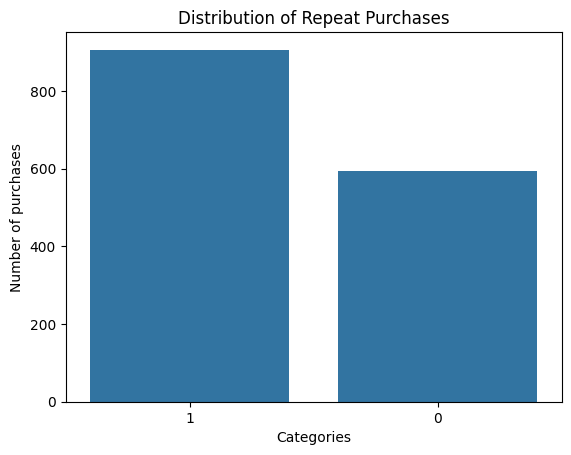

In [43]:
# plotting the data
sb.countplot(data = pet_supplies, x = 'repeat_purchase', color = main_color);
plt.title("Distribution of Repeat Purchases")
plt.xlabel("Categories")
plt.ylabel("Number of purchases");

*There were more repeat purchases made which had over 800 observations*

## Task 2

2. Checking if observations are balanced across categories of the variable `repeat purchases`

Selecting the records with repeat purchases

In [44]:
new_pet = pet_supplies.loc[pet_supplies['repeat_purchase'] == '1']

In [45]:
new_pet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       906 non-null    object 
 1   category         906 non-null    object 
 2   animal           906 non-null    object 
 3   size             906 non-null    object 
 4   price            906 non-null    float64
 5   sales            906 non-null    float64
 6   rating           906 non-null    int64  
 7   repeat_purchase  906 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 63.7+ KB


906 records were repeat purchases

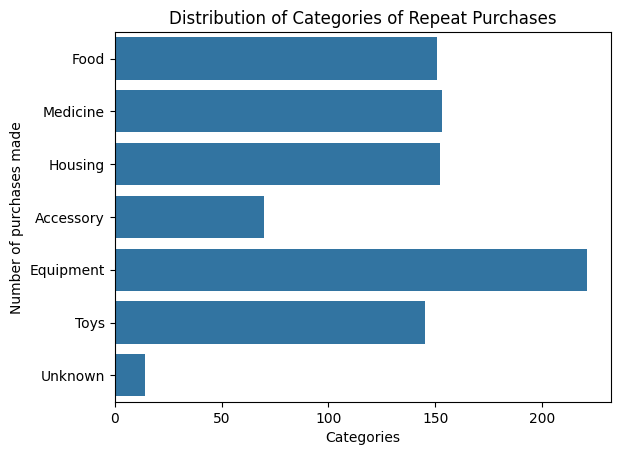

In [46]:
# plotting the data
sb.countplot(data = new_pet, y = 'category', color = main_color);
plt.title("Distribution of Categories of Repeat Purchases")
plt.xlabel("Categories")
plt.ylabel("Number of purchases made");

_The categories are not evenly distributed among repeat purchases. Equipment are the most repeat purchased followed by Food, Medicine, Housing and Toys. The Unkown category is the least purchased_

## Task 3  
3. Describe the distribution of all of the sales

Text(0.5, 1.0, 'Distribution of overall sales')

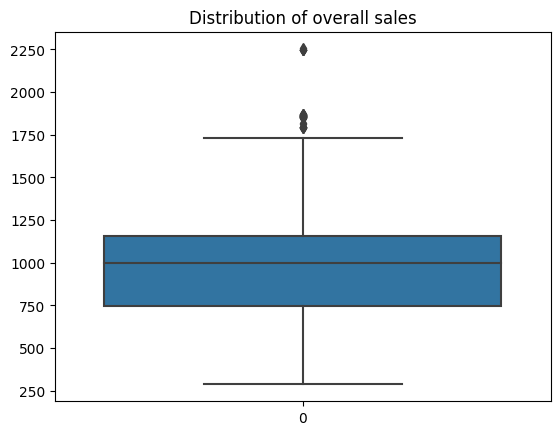

In [47]:
# plotting the data
sb.boxplot(data=pet_supplies['sales']);
plt.title('Distribution of overall sales')

_The minimum sales was about 250 and the maximum was about 1750 with few outliers outside the maximum value. The median sales is about 1000._

## Task 4  
4. Describe the relationship between repeat purchases and sales.

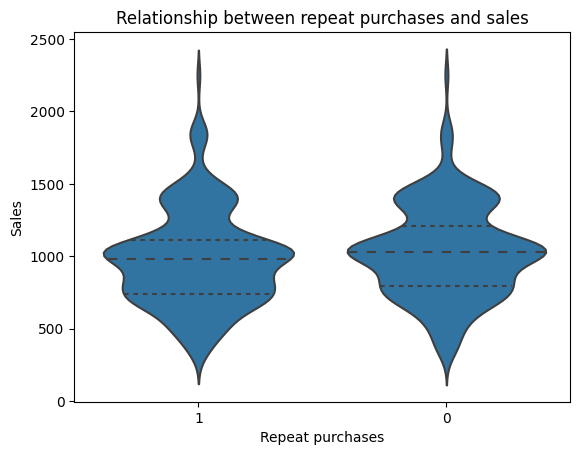

In [48]:
# plotting the data
sb.violinplot(data=pet_supplies, x='repeat_purchase', y='sales', color=main_color, inner='quartile');
plt.title('Relationship between repeat purchases and sales')
plt.xlabel('Repeat purchases')
plt.ylabel('Sales');

_Sales is distributed similarly between repeat purchases and one-off purchases._

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam